### 1. Write a thorough discussion of when to use ML and when not to use ML.

    Machine Learning should never be used as the first choice to address a business situation. Machine Learning should only be used when there is sufficient data that has been collected, stored, cleaned and analyzed. Then there should be a question that needs to be answered such as: “What is causing the trend we are seeing?” or “Can we change the trend we are seeing?”, or “Can we predict when instance X will occur?” Once a question has been established and it is determined that there is sufficient data that has been cleaned and analyzed then Machine Learning models can be prototyped and tested. It is important that during the prototyping and testing phase the team building the model works with the business team to make sure they identify the best features to include in the model. 
    After creating a model then it is important to begin testing and make sure that the model actually identifies information that is useful. The business must be able to use the model to make changes. If the model is not able to identify something that the business can be changed then they should not move forward with using Machine Learning in production. So for example if they are testing to see if they can increase the shopping habits of a group and both the experimental group and the control group increase their shopping habits then the model isn’t useful enough to put into production. Or if the model is not precise enough or has too many false positives it may not be worthwhile to push it into production. Machine Learning should only be used if it can answer a question that can lead to an action on the part of the business that will improve the desired metric better than doing nothing at all and in a cost-efficient manner.

### 2. Perform preprocessing on the Lending Club dataset. Use three methods.

In [64]:
import pandas as pd
import numpy as np

loan_df = pd.read_csv('../Class-Work/loans_full_schema.csv')

# expand output display so I can see all columns
pd.options.display.max_columns = 60
loan_df.head(20)

,emp_title,emp_length,state,homeownership,annual_income,verified_income,debt_to_income,annual_income_joint,verification_income_joint,debt_to_income_joint,delinq_2y,months_since_last_delinq,earliest_credit_line,inquiries_last_12m,total_credit_lines,open_credit_lines,total_credit_limit,total_credit_utilized,num_collections_last_12m,num_historical_failed_to_pay,months_since_90d_late,current_accounts_delinq,total_collection_amount_ever,current_installment_accounts,accounts_opened_24m,months_since_last_credit_inquiry,num_satisfactory_accounts,num_accounts_120d_past_due,num_accounts_30d_past_due,num_active_debit_accounts,total_debit_limit,num_total_cc_accounts,num_open_cc_accounts,num_cc_carrying_balance,num_mort_accounts,account_never_delinq_percent,tax_liens,public_record_bankrupt,loan_purpose,application_type,loan_amount,term,interest_rate,installment,grade,sub_grade,issue_month,loan_status,initial_listing_status,disbursement_method,balance,paid_total,paid_principal,paid_interest,paid_late_fees
0,global config engineer,3.0,NJ,MORTGAGE,90000.0,Verified,18.01,NaN,NaN,NaN,0,38.0,2001,6,28,10,70795,38767,0,0,38.0,0,1250,2,5,5.0,10,0.0,0,2,11100,14,8,6,1,92.9,0,0,moving,individual,28000,60,14.07,652.53,C,C3,Mar-2018,Current,whole,Cash,27015.86,1999.330000,984.14,1015.19,0.0
1,warehouse office clerk,10.0,HI,RENT,40000.0,Not Verified,5.04,NaN,NaN,NaN,0,NaN,1996,1,30,14,28800,4321,0,1,NaN,0,0,0,11,8.0,14,0.0,0,3,16500,24,14,4,0,100.0,0,1,debt_consolidation,individual,5000,36,12.61,167.54,C,C1,Feb-2018,Current,whole,Cash,4651.37,499.120000,348.63,150.49,0.0
2,assembly,3.0,WI,RENT,40000.0,Source Verified,21.15,NaN,NaN,NaN,0,28.0,2006,4,31,10,24193,16000,0,0,28.0,0,432,1,13,7.0,10,0.0,0,3,4300,14,8,6,0,93.5,0,0,other,individual,2000,36,17.09,71.40,D,D1,Feb-2018,Current,fractional,Cash,1824.63,281.800000,175.37,106.43,0.0
3,customer service,1.0,PA,RENT,30000.0,Not Verified,10.16,NaN,NaN,NaN,0,NaN,2007,0,4,4,25400,4997,0,1,NaN,0,0,1,1,15.0,4,0.0,0,2,19400,3,3,2,0,100.0,1,0,debt_consolidation,individual,21600,36,6.72,664.19,A,A3,Jan-2018,Current,whole,Cash,18853.26,3312.890000,2746.74,566.15,0.0
4,security supervisor,10.0,CA,RENT,35000.0,Verified,57.96,57000.0,Verified,37.66,0,NaN,2008,7,22,16,69839,52722,0,0,NaN,0,0,1,6,4.0,16,0.0,0,10,32700,20,15,13,0,100.0,0,0,credit_card,joint,23000,36,14.07,786.87,C,C3,Mar-2018,Current,whole,Cash,21430.15,2324.650000,1569.85,754.80,0.0
5,NaN,NaN,KY,OWN,34000.0,Not Verified,6.46,NaN,NaN,NaN,1,3.0,1990,6,32,12,42100,3898,0,0,60.0,0,0,0,2,5.0,12,0.0,0,1,27200,27,12,5,3,78.1,0,0,other,individual,5000,36,6.72,153.75,A,A3,Jan-2018,Current,whole,Cash,4256.71,873.130000,743.29,129.84,0.0
6,hr,10.0,MI,MORTGAGE,35000.0,Source Verified,23.66,155000.0,Not Verified,13.12,0,NaN,2004,1,12,10,291852,18916,0,0,NaN,0,0,2,1,9.0,10,0.0,0,3,9100,8,7,6,2,100.0,0,0,credit_card,joint,24000,60,13.59,553.35,C,C2,Jan-2018,Current,whole,Cash,22560.00,2730.510000,1440.00,1290.51,0.0
7,police,10.0,AZ,MORTGAGE,110000.0,Source Verified,16.19,NaN,NaN,NaN,1,19.0,2005,1,30,15,342336,60805,0,0,71.0,0,0,2,4,7.0,15,NaN,0,5,22250,16,12,10,7,93.0,0,0,debt_consolidation,individual,20000,60,11.99,444.79,B,B5,Jan-2018,Current,whole,Cash,19005.39,1765.840000,994.61,771.23,0.0
8,parts,10.0,NV,MORTGAGE,65000.0,Source Verified,36.48,NaN,NaN,NaN,1,18.0,1998,3,35,21,283190,69561,0,0,18.0,0,0,6,10,4.0,21,0.0,0,11,36700,19,14,14,2,97.1,0,0,home_improvement,individual,20000,36,13.59,679.58,C,C2,Feb-2018,Current,whole,Cash,18156.66,2703.220000,1843.34,859.88,0.0
9,4th person,3.0,IL,RENT,30000.0,Not Verified,18.91,NaN,NaN,NaN,0,NaN,2001,0,9,6,33114,17768,0,0,NaN,0,0,1,5,17.0,6,0.0,0,3,14700,7,5,3,0,100.0,0,0,credit_card,individual,6400,36,6.71,196.77,A,A3,Mar-2018,Current,fractional,Cash,6077.13,391.150000,322.87,68.28,0.0


#### Columns that might be worth preprocessing
* homeownership: nominal, two values- could use sklearn or one hot encoding
* verified_income: might be ordinal but unsure if source verified or verified is weighted more, three values
* verificaton_income: same as above but a lot of missing values
* loan_purpose: nominal, 12 values
* application_type: nominal, two values
* grade: ordinal 7 values
* sub_grade: ordinal 32 values
* loan_status: nominal, 6 values
* initial_listing_status: nominal, 2 values
* disbursement_method: nominal, 2 values

#### Columns that might be a bit messy for these preprocessing methods
* emp_title: nominal, 4741 unique titles
* state: nominal, 50 values

In [135]:
# checking number of values for different columns
print(loan_df['issue_month'].nunique())
loan_df['issue_month'].unique()

3


array([30, 11, 47, 37,  4, 16, 21,  3, 32, 13,  9, 39,  5, 41, 42, 44, 33,
       10, 23,  2, 19, 26, 28, 48, 29, 43,  8, 18, 36, 34, 35, 40, 22,  1,
       49, 17, 14, 15, 24, 46, 20, 45,  6, 31,  0, 25, 38, 27,  7, 12])

#### Using map function for ordinal preprocessing of issue_month, grade and sub_grade

In [66]:
# created a list from the sub_grade column unique values
sub_grade_list = list(loan_df['sub_grade'].unique())

In [67]:
# adding G2, G3 and G5 for consistency
sub_grade_list.append('G2')
sub_grade_list.append('G3')
sub_grade_list.append('G5')
# sort the list so that they're in order
sub_grade_list.sort()
# create a new_list to give me numbers for the dictionary we will create using a list comprehension
new_list = [i+1 for i in range(len(sub_grade_list))]
new_list

[1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35]

In [60]:
loan_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 55 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   emp_title                         9167 non-null   object 
 1   emp_length                        9183 non-null   float64
 2   state                             10000 non-null  object 
 3   homeownership                     10000 non-null  object 
 4   annual_income                     10000 non-null  float64
 5   verified_income                   10000 non-null  object 
 6   debt_to_income                    9976 non-null   float64
 7   annual_income_joint               1495 non-null   float64
 8   verification_income_joint         1455 non-null   object 
 9   debt_to_income_joint              1495 non-null   float64
 10  delinq_2y                         10000 non-null  int64  
 11  months_since_last_delinq          4342 non-null   float64
 12  earli

In [68]:
month_map = {'Jan-2018':1,'Feb-2018':2,'Mar-2018':3}
grade_map = {'A':1,'B':2,'C':3,'D':4,'E':5,'F':6,'G':7}
# use dict and zip to create a dictionary with values for all the sub_grades
sub_grade_map = dict(zip(sub_grade_list, new_list))
loan_df['issue_month'] = loan_df['issue_month'].map(month_map)
loan_df['grade'] = loan_df['grade'].map(grade_map)
loan_df['sub_grade'] = loan_df['sub_grade'].map(sub_grade_map)
loan_df.head()

,emp_title,emp_length,state,homeownership,annual_income,verified_income,debt_to_income,annual_income_joint,verification_income_joint,debt_to_income_joint,delinq_2y,months_since_last_delinq,earliest_credit_line,inquiries_last_12m,total_credit_lines,open_credit_lines,total_credit_limit,total_credit_utilized,num_collections_last_12m,num_historical_failed_to_pay,months_since_90d_late,current_accounts_delinq,total_collection_amount_ever,current_installment_accounts,accounts_opened_24m,months_since_last_credit_inquiry,num_satisfactory_accounts,num_accounts_120d_past_due,num_accounts_30d_past_due,num_active_debit_accounts,total_debit_limit,num_total_cc_accounts,num_open_cc_accounts,num_cc_carrying_balance,num_mort_accounts,account_never_delinq_percent,tax_liens,public_record_bankrupt,loan_purpose,application_type,loan_amount,term,interest_rate,installment,grade,sub_grade,issue_month,loan_status,initial_listing_status,disbursement_method,balance,paid_total,paid_principal,paid_interest,paid_late_fees
0,global config engineer,3.0,NJ,MORTGAGE,90000.0,Verified,18.01,NaN,NaN,NaN,0,38.0,2001,6,28,10,70795,38767,0,0,38.0,0,1250,2,5,5.0,10,0.0,0,2,11100,14,8,6,1,92.9,0,0,moving,individual,28000,60,14.07,652.53,3,13,3,Current,whole,Cash,27015.86,1999.33,984.14,1015.19,0.0
1,warehouse office clerk,10.0,HI,RENT,40000.0,Not Verified,5.04,NaN,NaN,NaN,0,NaN,1996,1,30,14,28800,4321,0,1,NaN,0,0,0,11,8.0,14,0.0,0,3,16500,24,14,4,0,100.0,0,1,debt_consolidation,individual,5000,36,12.61,167.54,3,11,2,Current,whole,Cash,4651.37,499.12,348.63,150.49,0.0
2,assembly,3.0,WI,RENT,40000.0,Source Verified,21.15,NaN,NaN,NaN,0,28.0,2006,4,31,10,24193,16000,0,0,28.0,0,432,1,13,7.0,10,0.0,0,3,4300,14,8,6,0,93.5,0,0,other,individual,2000,36,17.09,71.40,4,16,2,Current,fractional,Cash,1824.63,281.80,175.37,106.43,0.0
3,customer service,1.0,PA,RENT,30000.0,Not Verified,10.16,NaN,NaN,NaN,0,NaN,2007,0,4,4,25400,4997,0,1,NaN,0,0,1,1,15.0,4,0.0,0,2,19400,3,3,2,0,100.0,1,0,debt_consolidation,individual,21600,36,6.72,664.19,1,3,1,Current,whole,Cash,18853.26,3312.89,2746.74,566.15,0.0
4,security supervisor,10.0,CA,RENT,35000.0,Verified,57.96,57000.0,Verified,37.66,0,NaN,2008,7,22,16,69839,52722,0,0,NaN,0,0,1,6,4.0,16,0.0,0,10,32700,20,15,13,0,100.0,0,0,credit_card,joint,23000,36,14.07,786.87,3,13,3,Current,whole,Cash,21430.15,2324.65,1569.85,754.80,0.0


#### Preprocessing using sklearn and LabelEncoder for some nominal values
Using this with 'emp_title', 'state', 'disbursement_method', 'initial_listing_status', and 'loan_status'.
This is not ideal for all of these especially state and employment title, but I'm hoping that state and employment title are not things that would usually weigh heavily in a loan decision. But I also didn't want to create over 4000 emp_title columns or 50 state columns.

In [69]:
from sklearn.preprocessing import LabelEncoder

emp_labels= LabelEncoder()
loan_df['emp_title']=emp_labels.fit_transform(loan_df['emp_title'].values)

state_labels= LabelEncoder()
loan_df['state']=state_labels.fit_transform(loan_df['state'].values)

disbursement_labels = LabelEncoder()
loan_df['disbursement_method']=disbursement_labels.fit_transform(loan_df['disbursement_method'].values)

initial_labels = LabelEncoder()
loan_df['initial_listing_status']=initial_labels.fit_transform(loan_df['initial_listing_status'].values)

status_labels = LabelEncoder()
loan_df['loan_status']=status_labels.fit_transform(loan_df['loan_status'].values)

loan_df.head()

,emp_title,emp_length,state,homeownership,annual_income,verified_income,debt_to_income,annual_income_joint,verification_income_joint,debt_to_income_joint,delinq_2y,months_since_last_delinq,earliest_credit_line,inquiries_last_12m,total_credit_lines,open_credit_lines,total_credit_limit,total_credit_utilized,num_collections_last_12m,num_historical_failed_to_pay,months_since_90d_late,current_accounts_delinq,total_collection_amount_ever,current_installment_accounts,accounts_opened_24m,months_since_last_credit_inquiry,num_satisfactory_accounts,num_accounts_120d_past_due,num_accounts_30d_past_due,num_active_debit_accounts,total_debit_limit,num_total_cc_accounts,num_open_cc_accounts,num_cc_carrying_balance,num_mort_accounts,account_never_delinq_percent,tax_liens,public_record_bankrupt,loan_purpose,application_type,loan_amount,term,interest_rate,installment,grade,sub_grade,issue_month,loan_status,initial_listing_status,disbursement_method,balance,paid_total,paid_principal,paid_interest,paid_late_fees
0,1777,3.0,30,MORTGAGE,90000.0,Verified,18.01,NaN,NaN,NaN,0,38.0,2001,6,28,10,70795,38767,0,0,38.0,0,1250,2,5,5.0,10,0.0,0,2,11100,14,8,6,1,92.9,0,0,moving,individual,28000,60,14.07,652.53,3,13,3,1,1,0,27015.86,1999.33,984.14,1015.19,0.0
1,4675,10.0,11,RENT,40000.0,Not Verified,5.04,NaN,NaN,NaN,0,NaN,1996,1,30,14,28800,4321,0,1,NaN,0,0,0,11,8.0,14,0.0,0,3,16500,24,14,4,0,100.0,0,1,debt_consolidation,individual,5000,36,12.61,167.54,3,11,2,1,1,0,4651.37,499.12,348.63,150.49,0.0
2,207,3.0,47,RENT,40000.0,Source Verified,21.15,NaN,NaN,NaN,0,28.0,2006,4,31,10,24193,16000,0,0,28.0,0,432,1,13,7.0,10,0.0,0,3,4300,14,8,6,0,93.5,0,0,other,individual,2000,36,17.09,71.40,4,16,2,1,0,0,1824.63,281.80,175.37,106.43,0.0
3,1035,1.0,37,RENT,30000.0,Not Verified,10.16,NaN,NaN,NaN,0,NaN,2007,0,4,4,25400,4997,0,1,NaN,0,0,1,1,15.0,4,0.0,0,2,19400,3,3,2,0,100.0,1,0,debt_consolidation,individual,21600,36,6.72,664.19,1,3,1,1,1,0,18853.26,3312.89,2746.74,566.15,0.0
4,3710,10.0,4,RENT,35000.0,Verified,57.96,57000.0,Verified,37.66,0,NaN,2008,7,22,16,69839,52722,0,0,NaN,0,0,1,6,4.0,16,0.0,0,10,32700,20,15,13,0,100.0,0,0,credit_card,joint,23000,36,14.07,786.87,3,13,3,1,1,0,21430.15,2324.65,1569.85,754.80,0.0


#### Using One Hot Encoding for preprocessing nominal values
Will use this on homeownership, verified_income, verification_income_joint, loan_purpose, application_type


In [72]:
loan_df = pd.get_dummies(loan_df)
loan_df.head()

,emp_title,emp_length,state,annual_income,debt_to_income,annual_income_joint,debt_to_income_joint,delinq_2y,months_since_last_delinq,earliest_credit_line,inquiries_last_12m,total_credit_lines,open_credit_lines,total_credit_limit,total_credit_utilized,num_collections_last_12m,num_historical_failed_to_pay,months_since_90d_late,current_accounts_delinq,total_collection_amount_ever,current_installment_accounts,accounts_opened_24m,months_since_last_credit_inquiry,num_satisfactory_accounts,num_accounts_120d_past_due,num_accounts_30d_past_due,num_active_debit_accounts,total_debit_limit,num_total_cc_accounts,num_open_cc_accounts,...,initial_listing_status,disbursement_method,balance,paid_total,paid_principal,paid_interest,paid_late_fees,homeownership_MORTGAGE,homeownership_OWN,homeownership_RENT,verified_income_Not Verified,verified_income_Source Verified,verified_income_Verified,verification_income_joint_Not Verified,verification_income_joint_Source Verified,verification_income_joint_Verified,loan_purpose_car,loan_purpose_credit_card,loan_purpose_debt_consolidation,loan_purpose_home_improvement,loan_purpose_house,loan_purpose_major_purchase,loan_purpose_medical,loan_purpose_moving,loan_purpose_other,loan_purpose_renewable_energy,loan_purpose_small_business,loan_purpose_vacation,application_type_individual,application_type_joint
0,1777,3.0,30,90000.0,18.01,NaN,NaN,0,38.0,2001,6,28,10,70795,38767,0,0,38.0,0,1250,2,5,5.0,10,0.0,0,2,11100,14,8,...,1,0,27015.86,1999.33,984.14,1015.19,0.0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
1,4675,10.0,11,40000.0,5.04,NaN,NaN,0,NaN,1996,1,30,14,28800,4321,0,1,NaN,0,0,0,11,8.0,14,0.0,0,3,16500,24,14,...,1,0,4651.37,499.12,348.63,150.49,0.0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0
2,207,3.0,47,40000.0,21.15,NaN,NaN,0,28.0,2006,4,31,10,24193,16000,0,0,28.0,0,432,1,13,7.0,10,0.0,0,3,4300,14,8,...,0,0,1824.63,281.80,175.37,106.43,0.0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
3,1035,1.0,37,30000.0,10.16,NaN,NaN,0,NaN,2007,0,4,4,25400,4997,0,1,NaN,0,0,1,1,15.0,4,0.0,0,2,19400,3,3,...,1,0,18853.26,3312.89,2746.74,566.15,0.0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0
4,3710,10.0,4,35000.0,57.96,57000.0,37.66,0,NaN,2008,7,22,16,69839,52722,0,0,NaN,0,0,1,6,4.0,16,0.0,0,10,32700,20,15,...,1,0,21430.15,2324.65,1569.85,754.80,0.0,0,0,1,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1


### 3. Create a correlation matrix with a heatmap for the features in the dataset. Use markdown to write out your observations.

In [75]:
# create the correlation matrix
loan_corrMatrix = loan_df.corr()
print(loan_corrMatrix)


                               emp_title  emp_length     state  annual_income  \
emp_title                       1.000000    0.027525 -0.005315      -0.039931   
emp_length                      0.027525    1.000000  0.012828       0.096469   
state                          -0.005315    0.012828  1.000000      -0.026182   
annual_income                  -0.039931    0.096469 -0.026182       1.000000   
debt_to_income                  0.017898    0.026157  0.052622      -0.180445   
...                                  ...         ...       ...            ...   
loan_purpose_renewable_energy  -0.024179   -0.007402  0.000874       0.008567   
loan_purpose_small_business    -0.015175   -0.008398 -0.013489       0.019991   
loan_purpose_vacation          -0.006206    0.012893  0.002979      -0.010900   
application_type_individual    -0.038562   -0.031796 -0.011159       0.114218   
application_type_joint          0.038562    0.031796  0.011159      -0.114218   

                           

KeyboardInterrupt: 

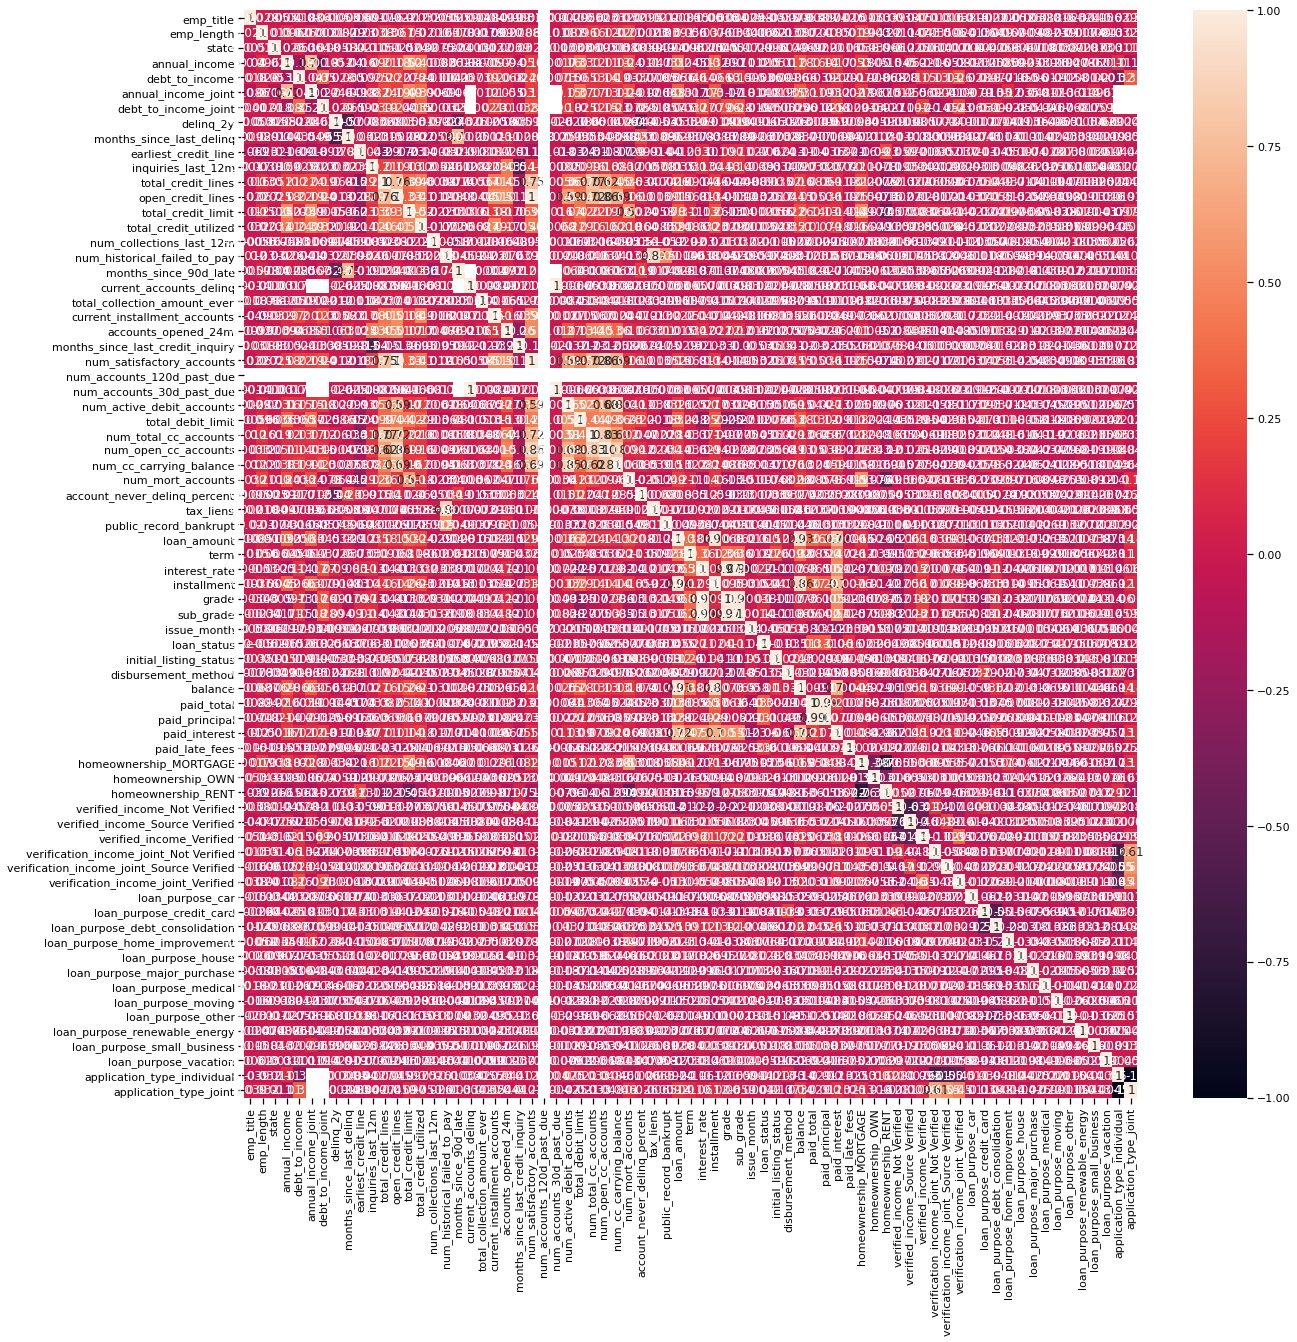

In [181]:
import seaborn as sn
import matplotlib.pyplot as plt

# use seaborn and matplotlib to create the visual representation
fig, ax = plt.subplots(figsize=(20,20))
sn.heatmap(loan_corrMatrix, annot=True)
plt.show()

In [81]:
# create the correlation matrix
loan2_corrMatrix = loan_df[['emp_length','annual_income','verified_income_Not Verified','verified_income_Source Verified','verified_income_Verified','debt_to_income','delinq_2y', 'months_since_last_delinq','num_collections_last_12m','num_historical_failed_to_pay','current_accounts_delinq','public_record_bankrupt','grade','sub_grade']].corr()
print(loan2_corrMatrix)
                            
loan3_corrMatrix = loan_df[['emp_length','annual_income_joint','verification_income_joint_Not Verified','verification_income_joint_Source Verified','verification_income_joint_Verified','debt_to_income_joint','delinq_2y', 'months_since_last_delinq','num_collections_last_12m','num_historical_failed_to_pay','current_accounts_delinq','public_record_bankrupt','grade','sub_grade']].corr()
print(loan3_corrMatrix)                            

                                 emp_length  annual_income  \
emp_length                         1.000000       0.096469   
annual_income                      0.096469       1.000000   
verified_income_Not Verified       0.011419      -0.045089   
verified_income_Source Verified   -0.046594       0.062093   
verified_income_Verified           0.042853      -0.021234   
debt_to_income                     0.026157      -0.180445   
delinq_2y                          0.008242       0.052236   
months_since_last_delinq           0.028790      -0.040392   
num_collections_last_12m          -0.015729      -0.008330   
num_historical_failed_to_pay       0.029997       0.025976   
current_accounts_delinq           -0.011075       0.001665   
public_record_bankrupt             0.030083      -0.030568   
grade                             -0.029687      -0.096714   
sub_grade                         -0.034364      -0.105057   

                                 verified_income_Not Verified  \
emp_

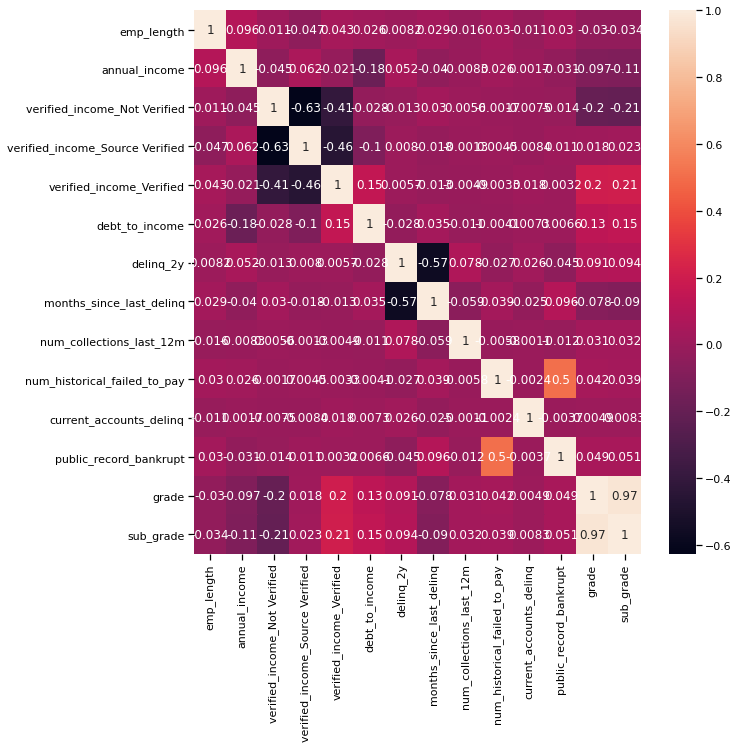

In [256]:
# use seaborn and matplotlib to create the visual representation
fig, ax = plt.subplots(figsize=(10,10))
sn.heatmap(loan2_corrMatrix, annot=True)

plt.show()

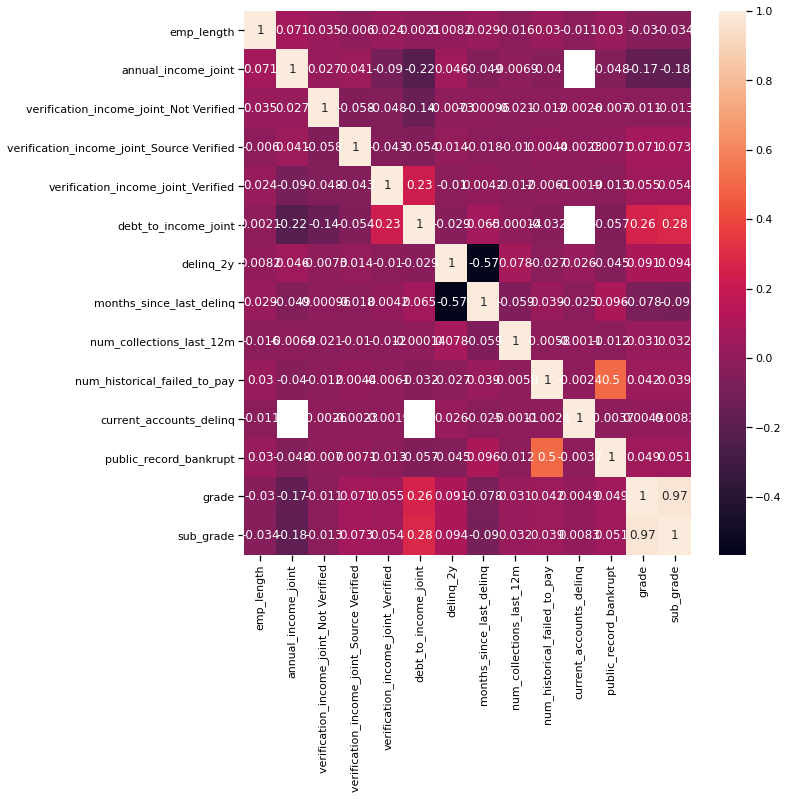

In [257]:
# use seaborn and matplotlib to create the visual representation
fig, ax = plt.subplots(figsize=(10,10))
sn.heatmap(loan3_corrMatrix, annot=True)
plt.show()

In [122]:
# create the correlation matrix
loan4_corrMatrix = loan_df[['emp_length','annual_income','debt_to_income','verified_income_Verified','total_credit_limit','num_historical_failed_to_pay','public_record_bankrupt','interest_rate','sub_grade']].corr()
print(loan4_corrMatrix)
                            
loan5_corrMatrix = loan_df[['emp_length','annual_income_joint','debt_to_income_joint','verification_income_joint_Verified','total_credit_limit','num_historical_failed_to_pay','public_record_bankrupt','interest_rate','sub_grade']].corr()
print(loan5_corrMatrix)    

                              emp_length  annual_income  debt_to_income  \
emp_length                      1.000000       0.096469        0.026157   
annual_income                   0.096469       1.000000       -0.180445   
debt_to_income                  0.026157      -0.180445        1.000000   
verified_income_Verified        0.042853      -0.021234        0.150472   
total_credit_limit              0.147594       0.516703        0.075174   
num_historical_failed_to_pay    0.029997       0.025976       -0.004146   
public_record_bankrupt          0.030083      -0.030568        0.006560   
interest_rate                  -0.029621      -0.099584        0.141653   
sub_grade                      -0.034364      -0.105057        0.145494   

                              verified_income_Verified  total_credit_limit  \
emp_length                                    0.042853            0.147594   
annual_income                                -0.021234            0.516703   
debt_to_income 

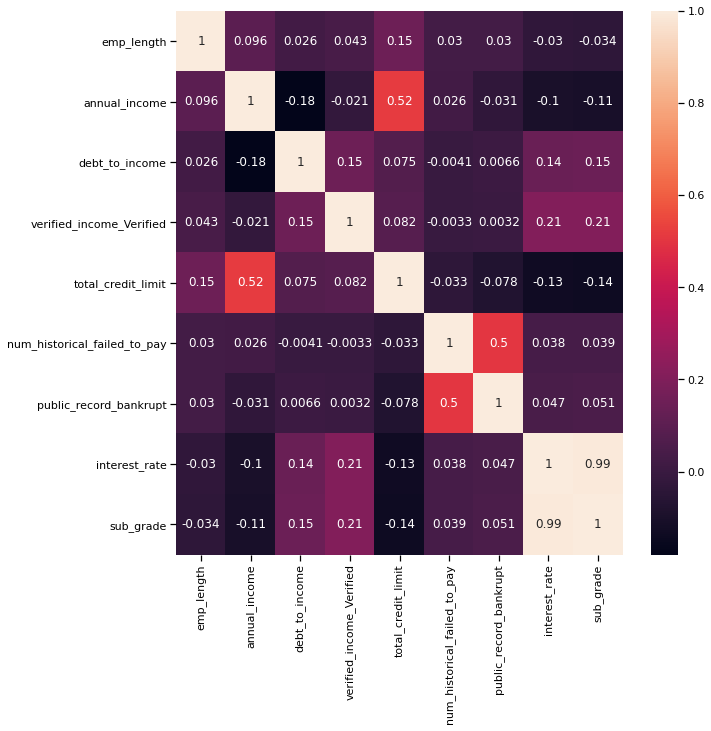

In [258]:
# use seaborn and matplotlib to create the visual representation
fig, ax = plt.subplots(figsize=(10,10))
sn.heatmap(loan4_corrMatrix, annot=True)
plt.show()

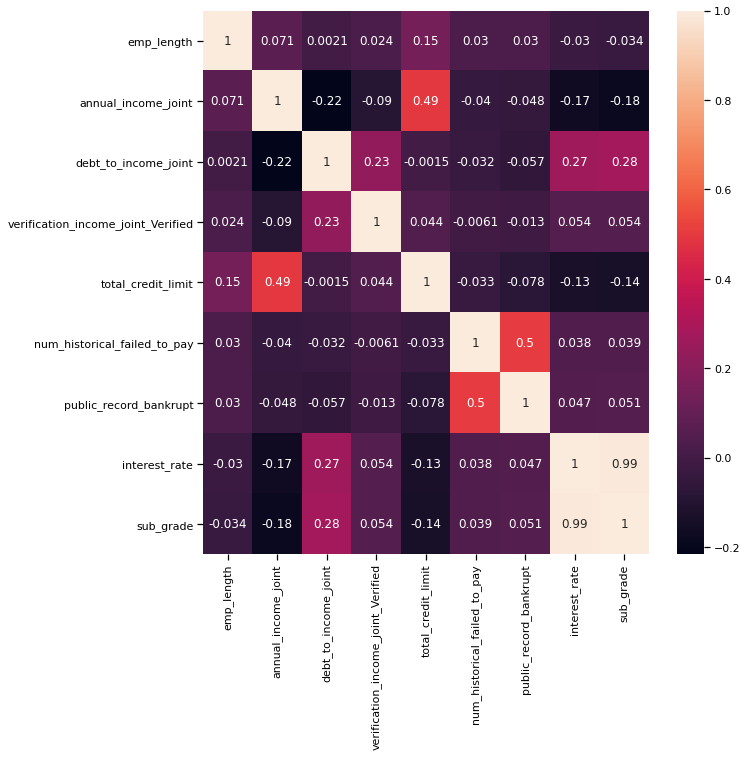

In [259]:
# use seaborn and matplotlib to create the visual representation
fig, ax = plt.subplots(figsize=(10,10))
sn.heatmap(loan5_corrMatrix, annot=True)
plt.show()

I initially created a correlation matrix and heatmap for all features of the Lending Club dataset which produced a matrix that was way too large to be useful and a heatmap that was too diluted to see anything. I then tried creating a correlation matrix with features that I thought would be more likely to indicate that a person got a high grade for determining their loan status. And from there I narrowed down my features even further to be able to see some of the stronger correlations more clearly. I split out the individual and joint applications to see if factors differed between the two groups. 

I found the following:
* For individuals who received loans the verified income status was the strongest indicator of loan sub-grade with a correlation of 0.21. Debt-to-income ratio was the second strongest indicator of loan subgrade with a correlation of 0.15.
* For those submitting joint applications who received loans the joint debt-to-income ratio was the strongest indicator of loan subgrade with a correlation of 0.28.
* Interest rate is strongly correlated with subgrade for both groups at 0.99.
* Total credit limit was strongly correlated for both groups with annual_income/annual_income_joint  with correlations of 0.52 and 0.49 respectively.
* Annual income and joint annual income had small negative correlations with loan subgrade with -0.11 and -0.18 respectively.

#### Debt-to-income ratio seems to be the strongest indicator for the grade of loan someone gets and the interest rate that they are offered.


### 4. Create a histogram showing the frequency of loan_amounts. Describe what you see. Pay special attention to bin sizes, and clearly describe how you chose your bin sizes. 

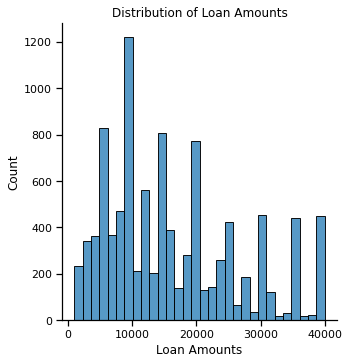

In [134]:
sn.displot(data = 'loan_df', x= loan_df['loan_amount'], bins=30)
plt.title('Distribution of Loan Amounts')
plt.xlabel('Loan Amounts')
plt.show()


Most of the loans appear to be 20k or less, with a high concentration of loans around 10k. There also tend to be a large number of loans at amount that are multiples of 5 (5k, 10k, 15k, 20k, etc). I wonder if people choose those amounts as sort of "round" numbers. I chose 30 bins because I thought it was more helpful for seeing the slight right skew to the data as well as for seeing those 5k jumps. I looked at smaller and larger bin sizes and I felt like smaller bin sizes lost some of the variance in the data and larger bin sizes started to make it harder to see trends.


### 5.	Create a new column called region that uses a lambda and shows which part of the US someone lives in, split up into Pacific, Plains, Midwest, Northeast, and South. Consider having your lambda call a function. 
#### a.	Is there a better way to do this than with a lambda? 
#### b.	Either use two different lambdas or a lambda and a different technique and see which one is more performant. Explain your findings in the markdown. 


In [218]:
import time

loan2_df = pd.read_csv('../Class-Work/loans_full_schema.csv')
# create lists for the regions
Pacific = ['WA','OR','ID','CA','NV','UT','AZ','HI','AK']
Plains = ['MT','ND','SD','WY','NE','CO','KS']
South = ['NM','TX','OK','AR','LA','TN','MS','AL','GA','FL','SC','NC']
Midwest = ['MN','IA','MO','IL','WI','MI','IN','KY','OH']
Northeast = ['VA','WV','MD','DE','PA','NJ','NY','VT','MA','RI','CT','ME','NH','DC']

region = {'Pacific':['WA','OR','ID','CA','NV','UT','AZ','HI','AK'],
         'Plains':['MT','ND','SD','WY','NE','CO','KS'],
         'South':['NM','TX','OK','AR','LA','TN','MS','AL','GA','FL','SC','NC'],
         'Midwest':['MN','IA','MO','IL','WI','MI','IN','KY','OH'],
         'Northeast':['VA','WV','MD','DE','PA','NJ','NY','VT','MA','RI','CT','ME','NH','DC']}
states = list(loan2_df['state'].unique())
#print(states)

tic = time.perf_counter()
region_list = []
def region_what(df, col_name, dict1):
    for item in df[col_name]:
        for x,y in dict1.items():
            if item in y:
                region_list.append(x)
    return region_list

region_what(loan2_df, 'state', region)
loan2_df['Region'] = region_list
toc = time.perf_counter()
print(f"Ran region_what in {toc - tic:0.4f} seconds")



Ran region_what in 0.0153 seconds


In [219]:
tic = time.perf_counter()
loan2_df['region'] = loan2_df['state'].apply(lambda x: "Plains" if x in Plains else ("Midwest" if x in Midwest else ("Pacific" if x in Pacific else ("South" if x in South else "Northeast")))) 
toc = time.perf_counter()
print(f"Ran lambda function in {toc - tic:0.4f} seconds")

Ran lambda function in 0.0112 seconds


#### The lambda function worked faster than the other function I wrote to create a list and then assigning the column with the list.

### 6.	Create subplot histograms to show if loan_amounts differ by region. Summarize your findings.

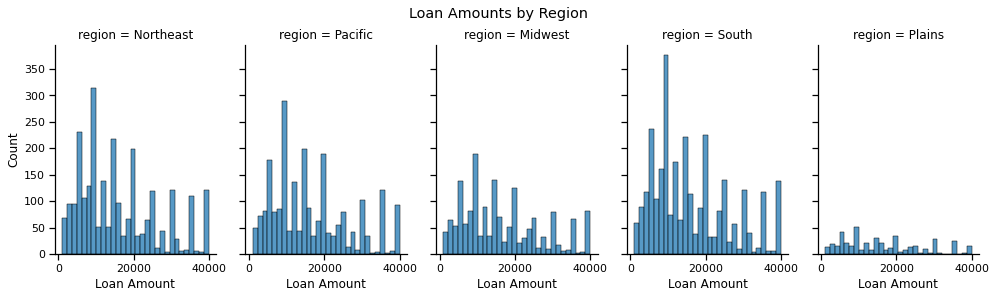

In [255]:
loan = sn.displot(data = 'loan2_df', x= loan2_df['loan_amount'], bins=30, col=loan2_df['region'], height=4, aspect=.7)
loan.fig.suptitle('Loan Amounts by Region', y=1.03)
loan.set_axis_labels("Loan Amount", "Count")
plt.show()
# I couldn't figure out how to get my subplot titles to change

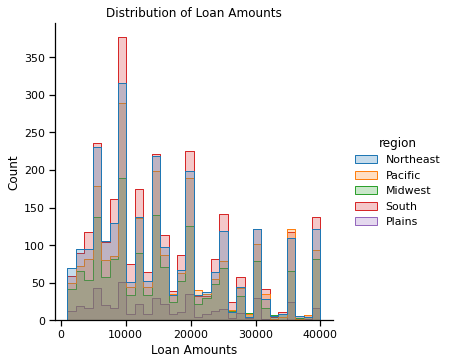

In [222]:
# just for fun here is a stacked view of the loan amounts by region
sn.displot(data = 'loan2_df', x= loan2_df['loan_amount'], bins=30, hue=loan2_df['region'], element="step")
plt.title('Distribution of Loan Amounts')
plt.xlabel('Loan Amounts')
plt.show()

#### The Plains region seems to have the least amount of loans overall, the South region appears to have the most loans overall. The South region looks the most like the overall distribtution of loans. The Northeast and Pacific regions appear to borrow similar amounts.